# Data Science Exam

## Convolutional Neural Network

## Import modules and libraries

In [0]:
import keras
import numpy as np
import itertools
import os
import random
import sklearn

from glob import glob
from matplotlib import pyplot as plt
from keras.callbacks import callbacks
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential 
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


## Mount drive and import data

In [0]:
# Mount google drive to import data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
X = np.load("/content/gdrive/My Drive/data_science/X.npy")
Y = np.load("/content/gdrive/My Drive/data_science/Y.npy")


## Describe the data


Total number of images: 5547
Number of IDC(-) Images: 2759
Number of IDC(+) Images: 2788
Percentage of positive images: 50.26%
Image shape (Width, Height, Channels): (50, 50, 3)


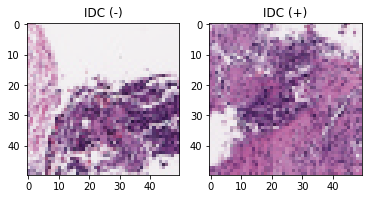

In [0]:
def describeData(a,b):
    ''' This function is from https://www.kaggle.com/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/data?fbclid=IwAR3DIFz9PxtXxFv4yRbwEADBCBFWf1Px35tYzP-kG4SBJB-qU49VLcvLc3I
    '''
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)

imgs0 = X[Y==0] # (0 = no IDC, 1 = IDC)
imgs1 = X[Y==1] 

def plotOne(a,b):
    """
    This function is from https://www.kaggle.com/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/data?fbclid=IwAR3DIFz9PxtXxFv4yRbwEADBCBFWf1Px35tYzP-kG4SBJB-qU49VLcvLc3I
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[100])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[100])
plotOne(imgs0, imgs1) 

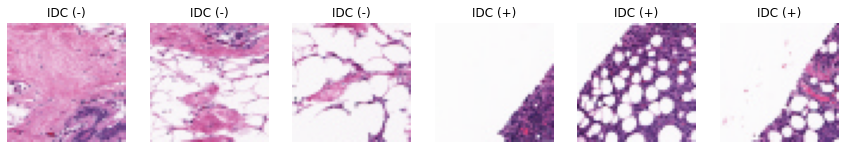

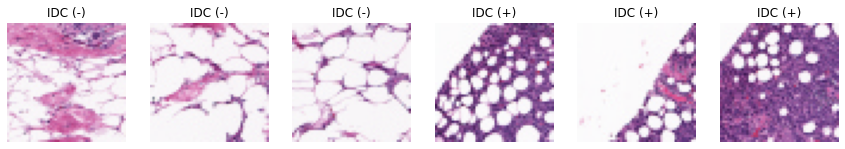

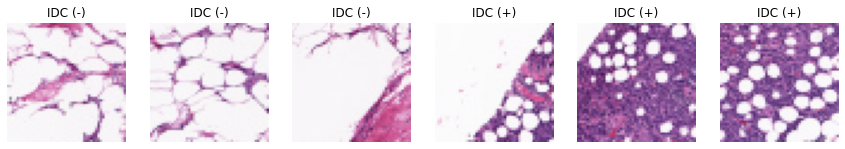

In [0]:
def plotTwo(a,b): 
    """
    This function is from https://www.kaggle.com/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/data?fbclid=IwAR3DIFz9PxtXxFv4yRbwEADBCBFWf1Px35tYzP-kG4SBJB-qU49VLcvLc3I
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

## Split and normalize the data

In [0]:
# Split the data in train, validation and test
train_data, test_data_all, train_label, test_label_all = train_test_split(X, Y, test_size=0.3) # using sklearn train_test_split function - making a test set that is 30% of all the data
val_data, test_data, val_label, test_label = train_test_split(test_data_all, test_label_all, test_size=0.50) # splitting the test set into a test and a validation set

# Summarize pixel values
print('Train', train_data.min(), train_data.max(), train_data.mean(), train_data.std())
print('Test', test_data.min(), test_data.max(), test_data.mean(), test_data.std())
print('Validation', val_data.min(), val_data.max(), val_data.mean(), val_data.std())

# Normalize the data by dividing with 256 to get values from 0 to 1
X_train = train_data / 256
X_test = test_data / 256
X_val = val_data / 256



Train 2 255 184.86197025588186 47.1385990232409
Test 4 255 185.81428395358142 47.35576230783098
Validation 5 255 185.05374423076924 47.64125135960371


In [0]:
# Encode labels to one-hot vectors
Y_train = to_categorical(train_label, num_classes = 2)
Y_val = to_categorical(val_label, num_classes = 2)
Y_test = to_categorical(test_label, num_classes = 2)


## Set up the first model
and test different batch sizes and epochs


Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.7179 - accuracy: 0.5936 - val_loss: 0.6324 - val_accuracy: 0.7109
Epoch 2/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.6201 - accuracy: 0.6974 - val_loss: 0.6155 - val_accuracy: 0.6611
Epoch 3/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.6200 - accuracy: 0.6901 - val_loss: 0.5823 - val_accuracy: 0.7091
Epoch 4/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.6003 - accuracy: 0.7039 - val_loss: 0.5725 - val_accuracy: 0.7452
Epoch 5/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.5685 - accuracy: 0.7318 - val_loss: 0.5766 - val_accuracy: 0.7043
Epoch 6/13
3882/3882 [==============================] - 37s 10ms/step - loss: 0.5495 - accuracy: 0.7504 - val_loss: 0.5829 - val_accuracy: 0.7248
Epoch 7/13
3882/3882 [==============================] - 33s 9ms/step - loss: 0.530

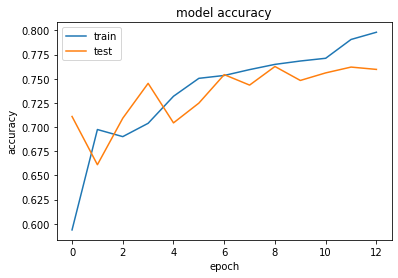


Keras CNN #1 - accuracy: 0.7641056180000305 



In [0]:
# ---------------------------- Build the first model -------------------------

# Get input dimensions
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 3)

# Set bach size, number of classes to classify and number of epochs
batch_size = 64
num_classes = 2
epochs = 13

# The model (sequential means fully connected feedforward neural netowok structure)
model = Sequential()

# Add layers
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) # 32 5x5 sized kernals /filters and  relu activation
model.add(Conv2D(64, (3, 3), activation='relu')) # 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid', kernel_initializer='he_normal',  kernel_regularizer='l2'))

model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model and save in "history" for plotting accuracy for train and validation every epoch
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Run the model on the test set
score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #1 - accuracy:', score[1],'\n')

# Save model structure in plot 
plot_model(model, to_file='C:/Users/annaa/OneDrive/8.semester/DataScience/lymphoma-subtype-classification-fl-vs-cll/model_structure1.png', show_shapes=True,show_layer_names=True)

# 0.76 - overfit




## Test batch normalization

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 47s 12ms/step - loss: 1.0832 - accuracy: 0.5882 - val_loss: 0.8067 - val_accuracy: 0.5030
Epoch 2/13
3882/3882 [==============================] - 46s 12ms/step - loss: 0.6312 - accuracy: 0.6162 - val_loss: 0.6822 - val_accuracy: 0.6280
Epoch 3/13
3882/3882 [==============================] - 46s 12ms/step - loss: 0.6419 - accuracy: 0.6289 - val_loss: 0.6567 - val_accuracy: 0.6893
Epoch 4/13
3882/3882 [==============================] - 46s 12ms/step - loss: 0.6349 - accuracy: 0.6394 - val_loss: 0.6281 - val_accuracy: 0.7584
Epoch 5/13
3882/3882 [==============================] - 46s 12ms/step - loss: 0.6378 - accuracy: 0.6303 - val_loss: 0.6322 - val_accuracy: 0.6406
Epoch 6/13
3882/3882 [==============================] - 46s 12ms/step - loss: 0.6361 - accuracy: 0.6262 - val_loss: 0.6226 - val_accuracy: 0.6328
Epoch 7/13
3882/3882 [==============================] - 46s 12ms/step - loss:

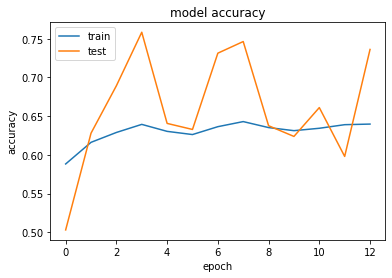

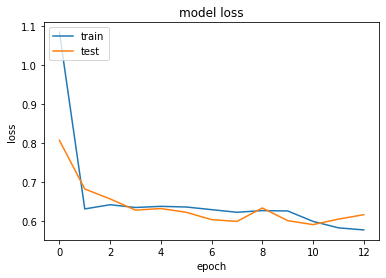


Keras CNN #2 - accuracy: 0.7448979616165161 



In [0]:
#-------------------- With batch normalization  ----------
# Apply batch normalizationa at every conv layer
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 3)

batch_size = 64
num_classes = 2
epochs = 13

model = Sequential()

# Conv layer followed by batch normalization
model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

# Conv layer followed by batch normalization
model.add(Conv2D(64, (3, 3), use_bias =False))
model.add(BatchNormalization())
model.add(Activation("relu"))

# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout
model.add(Dropout(0.25))
model.add(Flatten())

# Dense
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #2 - accuracy:', score[1],'\n')


# Improvement 77.55%!! - no overfit, but lot of jumps in accuracy and high loss


## Trying different optimizers and learning rates 


Train on 3882 samples, validate on 832 samples
Epoch 1/20
3882/3882 [==============================] - 48s 12ms/step - loss: 3.0882 - accuracy: 0.6859 - val_loss: 2.9413 - val_accuracy: 0.5042
Epoch 2/20
3882/3882 [==============================] - 48s 12ms/step - loss: 2.6452 - accuracy: 0.7281 - val_loss: 2.5606 - val_accuracy: 0.6869
Epoch 3/20
3882/3882 [==============================] - 47s 12ms/step - loss: 2.2911 - accuracy: 0.7564 - val_loss: 2.2382 - val_accuracy: 0.7097
Epoch 4/20
3882/3882 [==============================] - 47s 12ms/step - loss: 1.9946 - accuracy: 0.7657 - val_loss: 1.9974 - val_accuracy: 0.5397
Epoch 5/20
3882/3882 [==============================] - 48s 12ms/step - loss: 1.7498 - accuracy: 0.7658 - val_loss: 1.8149 - val_accuracy: 0.5150
Epoch 6/20
3882/3882 [==============================] - 48s 12ms/step - loss: 1.5522 - accuracy: 0.7711 - val_loss: 1.6253 - val_accuracy: 0.5276
Epoch 7/20
3882/3882 [==============================] - 47s 12ms/step - loss:

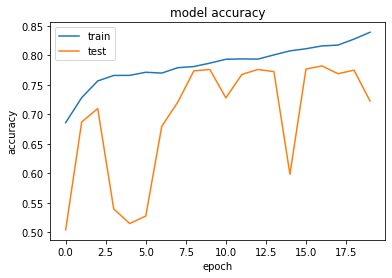

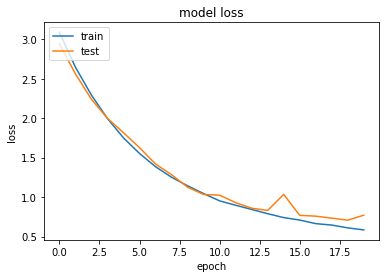


Keras CNN #3 - accuracy: 0.7304921746253967 



In [0]:
# -------------------- Trying different optimizers and learning rates -------------

img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 3)

batch_size = 64
num_classes = 2
epochs = 20

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape, use_bias=False)) # Conv layer 
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), use_bias =False)) # Conv layer
model.add(BatchNormalization()) # Batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling
model.add(Dropout(0.25)) # dropout
model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_initializer='he_normal',  kernel_regularizer='l2')) # Dense
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

learn = 0.0001 # lower learning rate than default 0.01
#opt = SGD(lr=learn, momentum=0.5)
opt = Adam(lr = learn)
model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #3 - accuracy:', score[1],'\n')
print('\nKeras CNN #3 - loss:', score[0],'\n')
# SGD not good
# however changing to lower learning rate seem to work well 
# Adam with learning rate 0.0001 on 13 epochs = 78.17% - but some over fit 

## Try different weight initializations

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.6526 - accuracy: 0.6927 - val_loss: 0.9272 - val_accuracy: 0.5018
Epoch 2/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.5285 - accuracy: 0.7497 - val_loss: 0.8033 - val_accuracy: 0.5829
Epoch 3/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.5202 - accuracy: 0.7631 - val_loss: 0.6138 - val_accuracy: 0.6755
Epoch 4/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.5153 - accuracy: 0.7602 - val_loss: 0.5385 - val_accuracy: 0.7314
Epoch 5/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.4985 - accuracy: 0.7687 - val_loss: 0.5060 - val_accuracy: 0.7638
Epoch 6/13
3882/3882 [==============================] - 47s 12ms/step - loss: 0.4872 - accuracy: 0.7728 - val_loss: 0.4924 - val_accuracy: 0.7668
Epoch 7/13
3882/3882 [==============================] - 47s 12ms/step - loss:

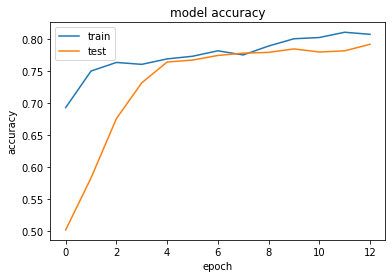

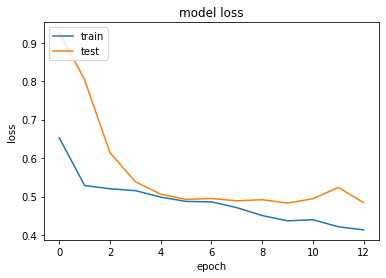


Keras CNN #4 - accuracy: 0.7863145470619202 



In [0]:
# -------------------- try different weight initialization -------------
batch_size = 64
num_classes = 2
epochs = 13

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape, kernel_initializer='he_normal', use_bias=False)) # Conv layer
model.add(BatchNormalization()) # Batch normalization
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), use_bias =False)) # Conv layer
model.add(BatchNormalization()) # Batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling
model.add(Dropout(0.25)) # Dropout
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal', activation ="relu")) # Dense
model.add(Dropout(0.5)) # Dropout
model.add(Dense(num_classes, activation='sigmoid')) # Output layer
opt = Adam(lr=0.0001)
model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #4 - accuracy:', score[1],'\n')
print('\nKeras CNN #4 - loss:', score[0],'\n')
# he-initilization looks good, with less overfitting =78.63%

## Test Regularizers

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 48s 12ms/step - loss: 4.8782 - accuracy: 0.7190 - val_loss: 5.1863 - val_accuracy: 0.5018
Epoch 2/13
3882/3882 [==============================] - 48s 12ms/step - loss: 4.3251 - accuracy: 0.7570 - val_loss: 4.3557 - val_accuracy: 0.5980
Epoch 3/13
3882/3882 [==============================] - 48s 12ms/step - loss: 3.8776 - accuracy: 0.7621 - val_loss: 3.7150 - val_accuracy: 0.7212
Epoch 4/13
3882/3882 [==============================] - 48s 12ms/step - loss: 3.5028 - accuracy: 0.7661 - val_loss: 3.3481 - val_accuracy: 0.7566
Epoch 5/13
3882/3882 [==============================] - 48s 12ms/step - loss: 3.1918 - accuracy: 0.7696 - val_loss: 3.1124 - val_accuracy: 0.7302
Epoch 6/13
3882/3882 [==============================] - 48s 12ms/step - loss: 2.9238 - accuracy: 0.7720 - val_loss: 2.8703 - val_accuracy: 0.7368
Epoch 7/13
3882/3882 [==============================] - 48s 12ms/step - loss:

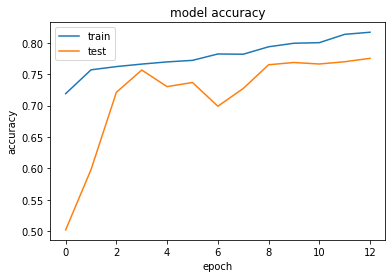

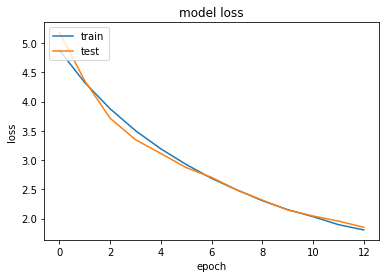


Keras CNN #5 - accuracy: 0.772508978843689 



In [0]:
batch_size = 64
num_classes = 2
epochs = 13

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape, kernel_initializer='he_normal', use_bias=False, kernel_regularizer='l2')) # Conv layer
model.add(BatchNormalization()) # Batch normalization
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), use_bias =False, kernel_initializer='he_normal', kernel_regularizer='l2')) # Conv layer
model.add(BatchNormalization()) # Batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling
model.add(Dropout(0.25)) # Dropout
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal',  kernel_regularizer='l2', activation ="relu")) # Dense
model.add(Dropout(0.5)) # Dropout
model.add(Dense(num_classes, activation='sigmoid')) # Output layer

opt = Adam(lr=0.0001)
model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=opt,
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #5 - accuracy:', score[1],'\n')
print('\nKeras CNN #5 - loss:', score[0],'\n')

# Does not help the overfit nor the accuracy- don't use L2 regualization

## 0-padding

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 56s 14ms/step - loss: 0.7049 - accuracy: 0.6586 - val_loss: 0.9967 - val_accuracy: 0.5030
Epoch 2/13
3882/3882 [==============================] - 55s 14ms/step - loss: 0.5592 - accuracy: 0.7257 - val_loss: 0.7306 - val_accuracy: 0.5811
Epoch 3/13
3882/3882 [==============================] - 55s 14ms/step - loss: 0.5563 - accuracy: 0.7199 - val_loss: 0.6423 - val_accuracy: 0.6605
Epoch 4/13
3882/3882 [==============================] - 55s 14ms/step - loss: 0.5366 - accuracy: 0.7438 - val_loss: 0.5370 - val_accuracy: 0.7452
Epoch 5/13
3882/3882 [==============================] - 55s 14ms/step - loss: 0.5418 - accuracy: 0.7333 - val_loss: 0.5303 - val_accuracy: 0.7392
Epoch 6/13
3882/3882 [==============================] - 55s 14ms/step - loss: 0.5216 - accuracy: 0.7545 - val_loss: 0.5175 - val_accuracy: 0.7686
Epoch 7/13
3882/3882 [==============================] - 55s 14ms/step - loss:

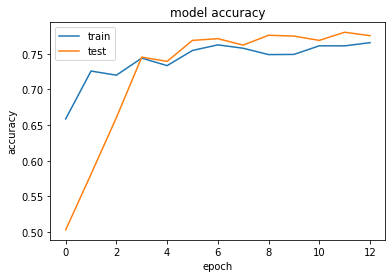

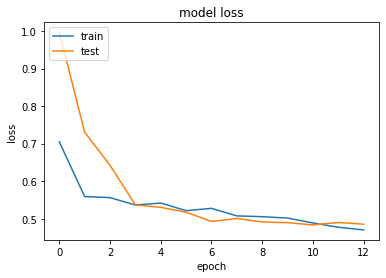


Keras CNN #6 - accuracy: 0.7821128368377686 


Keras CNN #6 - loss: 0.47299173016364976 

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 50, 32)        864       
_________________________________________________________________
batch_normalization_15 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
activation_25 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 50, 50, 64)        18432     
_________________________________________________________________
batch_normalization_16 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
activation_26 (Activation)   (None, 50, 50, 64)        0         
____________________________

In [0]:
batch_size = 64
num_classes = 2
epochs = 13
  
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape,
                    padding = "same", # Introduce 0-padding
                    use_bias =False, 
                    kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding = "same", use_bias = False, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation= "relu", kernel_initializer='he_normal'))
model.add(Dropout(0.6)) # Increased second dropout
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #6 - accuracy:', score[1],'\n')
print('\nKeras CNN #6 - loss:', score[0],'\n')

# So padding works well - only very little overfit and 78.27% accuracy

model.summary()


## Try more layers and a slightly different structure 

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 35s 9ms/step - loss: 2.1012 - accuracy: 0.5209 - val_loss: 1.4868 - val_accuracy: 0.4988
Epoch 2/13
3882/3882 [==============================] - 34s 9ms/step - loss: 1.2744 - accuracy: 0.5634 - val_loss: 1.1271 - val_accuracy: 0.4988
Epoch 3/13
3882/3882 [==============================] - 35s 9ms/step - loss: 0.9721 - accuracy: 0.6558 - val_loss: 0.8413 - val_accuracy: 0.7103
Epoch 4/13
3882/3882 [==============================] - 35s 9ms/step - loss: 0.8387 - accuracy: 0.6461 - val_loss: 0.7308 - val_accuracy: 0.7055
Epoch 5/13
3882/3882 [==============================] - 35s 9ms/step - loss: 0.7184 - accuracy: 0.6878 - val_loss: 0.7265 - val_accuracy: 0.6587
Epoch 6/13
3882/3882 [==============================] - 34s 9ms/step - loss: 0.6591 - accuracy: 0.7022 - val_loss: 0.6216 - val_accuracy: 0.7416
Epoch 7/13
3882/3882 [==============================] - 34s 9ms/step - loss: 0.5955

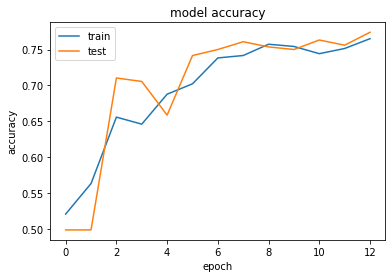

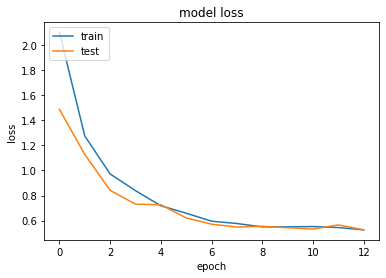


Keras CNN #test - accuracy: 0.7695078253746033 


Keras CNN #test - loss: 0.5209687644121598 



In [0]:
batch_size = 64
num_classes = 2
epochs = 13

model = Sequential()
model.add(Conv2D(64, (4, 4), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal',  kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64, kernel_initializer='he_normal',  kernel_regularizer='l2'))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()  

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #test - accuracy:', score[1],'\n')
print('\nKeras CNN #test - loss:', score[0],'\n')

# Doesn't change much

## Final model

Train on 3882 samples, validate on 832 samples
Epoch 1/13
3882/3882 [==============================] - 68s 17ms/step - loss: 0.6634 - accuracy: 0.6844 - val_loss: 1.0140 - val_accuracy: 0.4964
Epoch 2/13
3882/3882 [==============================] - 66s 17ms/step - loss: 0.5634 - accuracy: 0.7213 - val_loss: 0.7267 - val_accuracy: 0.5583
Epoch 3/13
3882/3882 [==============================] - 66s 17ms/step - loss: 0.5427 - accuracy: 0.7344 - val_loss: 0.5915 - val_accuracy: 0.6881
Epoch 4/13
3882/3882 [==============================] - 67s 17ms/step - loss: 0.5320 - accuracy: 0.7499 - val_loss: 0.5363 - val_accuracy: 0.7422
Epoch 5/13
3882/3882 [==============================] - 67s 17ms/step - loss: 0.5245 - accuracy: 0.7433 - val_loss: 0.5102 - val_accuracy: 0.7620
Epoch 6/13
3882/3882 [==============================] - 66s 17ms/step - loss: 0.5100 - accuracy: 0.7504 - val_loss: 0.4914 - val_accuracy: 0.7885
Epoch 7/13
3882/3882 [==============================] - 66s 17ms/step - loss:

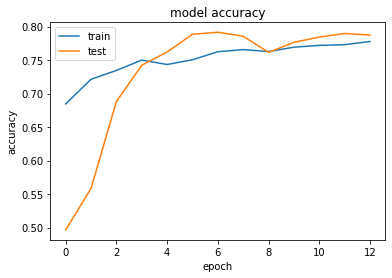

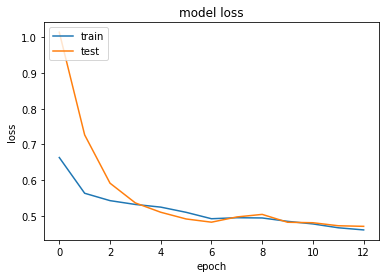


Keras CNN #final - accuracy: 0.7569027543067932 


Keras CNN #final - loss: 0.49952283880862297 



In [0]:
# final model
# bs= 64, epoch = 13 
# batch normalization, he-normal weight initialization 
# binary cross entropy and  adam optimizer with learning rate 0.0001
# dropout rate 0.25 0 0.6
# accuracy: 77.91%

batch_size = 64
num_classes = 2
epochs = 13
  
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                    input_shape=input_shape,
                    padding = "same",
                    use_bias =False, 
                    kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding = "same", use_bias = False, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation= "relu", kernel_initializer='he_normal'))
model.add(Dropout(0.6)) # Increased second dropout
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))
print(history.history.keys()) 

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()    

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('\nKeras CNN #final - accuracy:', score[1],'\n')
print('\nKeras CNN #final - loss:', score[0],'\n')


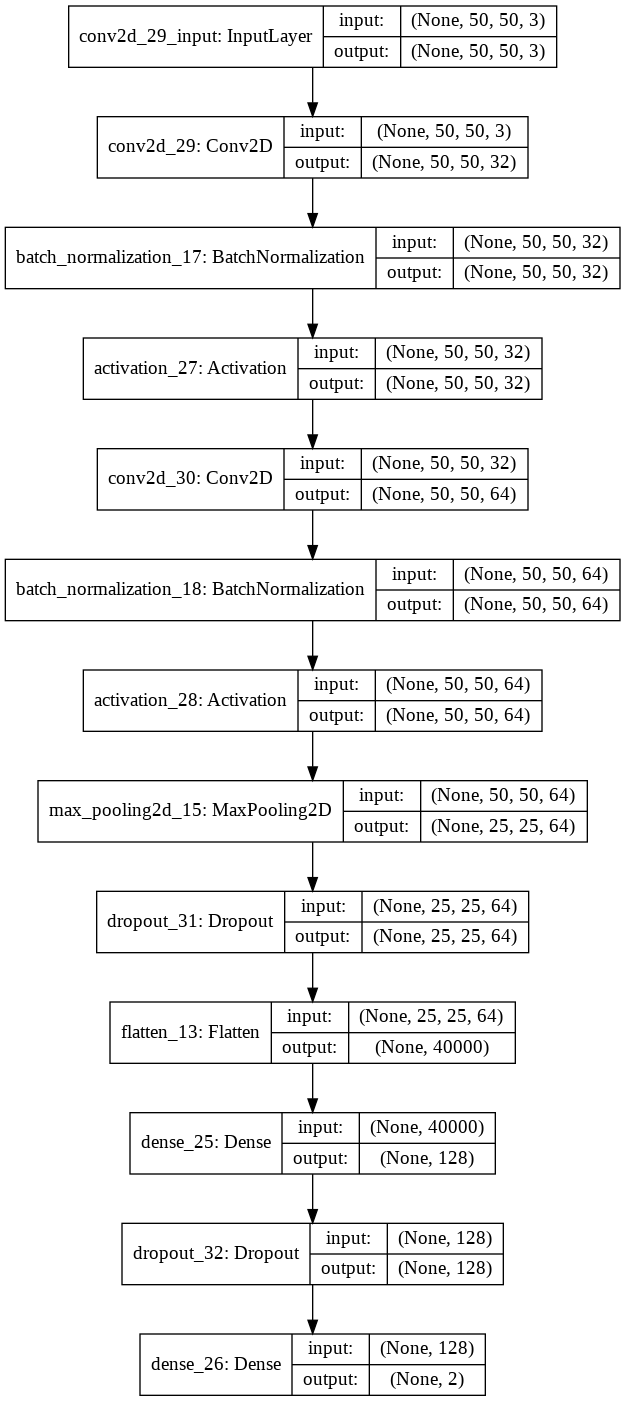

In [0]:
# Save the final model structure 

model_save_name = 'model_final.png'
path = F"/content/gdrive/My Drive/{model_save_name}" 
plot_model(model, path, show_shapes = True, show_layer_names= True)

## Confusion matrix

Confusion matrix, without normalization
[[332  88]
 [ 64 349]]


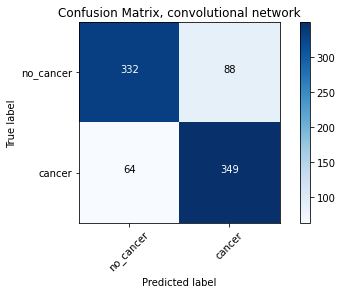

In [0]:
# Get predictions from model on validation data
rounded_predictions = model.predict_classes(x=X_test, batch_size=10, verbose=0)

# Create confusion matrix
cm = confusion_matrix(y_true=test_label, y_pred=rounded_predictions)

# Define plot function
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function is from https://deeplizard.com/learn/video/km7pxKy4UHU. 
    It prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_cancer','cancer']

# Plot confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix, convolutional network')